In [1]:
import os
import sys
import pickle
import numpy as np
import pandas as pd
from os import path
import seaborn as sns
from scipy import sparse, io
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from dotenv import load_dotenv, find_dotenv
%matplotlib inline

dotenv_path = find_dotenv()
load_dotenv(dotenv_path)

RAW_DATA_DIR='D:\\Documents\\Notebooks\\CapstoneProject\\data\\raw'


In [2]:
events = pd.read_csv(path.join(RAW_DATA_DIR, 'events.csv'))


In [3]:
events[['longitude', 'latitude']].describe()


,longitude,latitude
count,3.252950e+06,3.252950e+06
mean,7.796192e+01,2.162949e+01
std,5.405801e+01,1.569697e+01
min,-1.800000e+02,-3.843000e+01
25%,0.000000e+00,0.000000e+00
50%,1.129500e+02,2.802000e+01
75%,1.172100e+02,3.407000e+01
max,1.747600e+02,5.994000e+01


In [4]:
lo = events['longitude'].value_counts()
la = events['latitude'].value_counts()
sea_lo = lo.ix[[0,1]].sum()
land_lo = lo.drop([0,1])
land_lo = land_lo.sum()
sea_lo > land_lo/3


True

In [5]:
sea_la = la.ix[[0,1]].sum()
land_la = la.drop([0,1])
land_la = land_la.sum()
sea_la > land_la/3

True

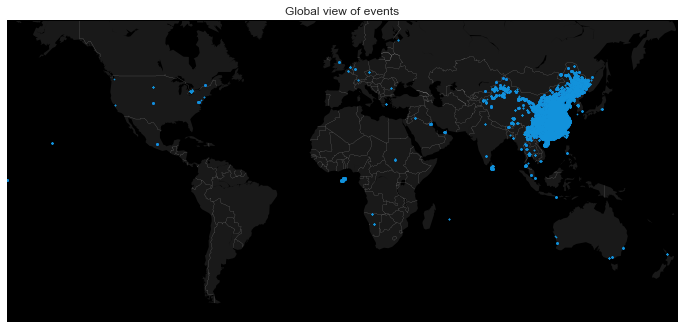

In [10]:
# Set up plot
df_events_sample = events.sample(n=100000)
plt.figure(1, figsize=(12,6))

# Mercator of World
m1 = Basemap(projection='merc',
             llcrnrlat=-60,
             urcrnrlat=65,
             llcrnrlon=-180,
             urcrnrlon=180,
             lat_ts=0,
             resolution='c')

m1.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m1.drawmapboundary(fill_color='#000000')                # black background
m1.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders

# Plot the data
mxy = m1(events["longitude"].tolist(), events["latitude"].tolist())
m1.scatter(mxy[0], mxy[1], s=3, c="#1292db", lw=0, alpha=1, zorder=5)

plt.title("Global view of events")
plt.show()